# DATA PREPARATION

## Step 1 - Loading the Required Libraries and Modules

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, StandardScaler, OneHotEncoder, PolynomialFeatures, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, SGDClassifier, Ridge, Lasso, ElasticNet
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, learning_curve
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.datasets import load_digits
import pickle 

## Step 2 - Reading the Data and performing Basic Data Checks

In [2]:
df = pd.read_csv('data_cleaning_analysis.csv')
print(df.shape)
df.describe()

(21613, 24)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,year_rate
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,...,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2014.322954,6.574423,15.688197,0.677046
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,...,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.467616,3.115308,8.635063,0.467616
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000,1.000000,0.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,2014.000000,4.000000,8.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000,6.000000,16.000000,1.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,9.000000,23.000000,1.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000,31.000000,1.000000


#### Ne garder que les paramètres demandés à l'utilisateur

In [3]:
df = df.drop(['date', 'nb_days', 'year_rate', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'month', 'day'], axis=1)

In [4]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,98178
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,98125
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,98028
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,98136
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,2009,0,98103
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,2014,0,98146
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,2009,0,98144
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,2004,0,98027


## Step 4 - Creating Arrays for the Features and the Response Variable

### Convertir les variables catégorielles en objets

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         21613 non-null  float64
 1   bedrooms      21613 non-null  int64  
 2   bathrooms     21613 non-null  float64
 3   sqft_living   21613 non-null  int64  
 4   sqft_lot      21613 non-null  int64  
 5   floors        21613 non-null  float64
 6   waterfront    21613 non-null  int64  
 7   view          21613 non-null  int64  
 8   condition     21613 non-null  int64  
 9   grade         21613 non-null  int64  
 10  sqft_above    21613 non-null  int64  
 11  yr_built      21613 non-null  int64  
 12  yr_renovated  21613 non-null  int64  
 13  zipcode       21613 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.3 MB


In [6]:
# Conversion zipcode en str
df['zipcode'] = df['zipcode'].astype(str)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         21613 non-null  float64
 1   bedrooms      21613 non-null  int64  
 2   bathrooms     21613 non-null  float64
 3   sqft_living   21613 non-null  int64  
 4   sqft_lot      21613 non-null  int64  
 5   floors        21613 non-null  float64
 6   waterfront    21613 non-null  int64  
 7   view          21613 non-null  int64  
 8   condition     21613 non-null  int64  
 9   grade         21613 non-null  int64  
 10  sqft_above    21613 non-null  int64  
 11  yr_built      21613 non-null  int64  
 12  yr_renovated  21613 non-null  int64  
 13  zipcode       21613 non-null  object 
dtypes: float64(3), int64(10), object(1)
memory usage: 2.3+ MB


## Step 4 - Creating the Training and Test Datasets  

### Diviser data set en training set et test set

In [8]:
# Séparer la target (i.e. price) des autres valeurs (X)
X = df.drop('price', axis=1)
y = df.price

In [9]:
# Split le dataset en spécifiant le pourcentage de data à garder dans le test dataset, ici 20%
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.20)

### Sélection des colonnes à encoder et à standardiser

In [10]:
# Sélection des colonnes numériques
num_col = list(X.select_dtypes(include=[float, int]).columns)

# Sélection des colonnes catégorielles
cat_col = list(X.select_dtypes(include=[object]).columns)

In [11]:
num_col

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'yr_built',
 'yr_renovated']

In [12]:
cat_col

['zipcode']

## Normalisation, standardisation 

Mettre les valeurs quantitatives sur la même échelle, ce qui facilite l'apprentissage des modèles de Machine Learning

### Encodage de chaque classe de la variable y en une valeur numérique

In [26]:
# Créer une pipeline pour les transformation à faire sur les variables numériques
# Standardisation: Transformer les variables pour qu'elles aient une moyenne égale à 0 et un écart type égal à 1

num_pipe = make_pipeline(StandardScaler(), PolynomialFeatures())

# Etablir les encodages à faire respectivement pour les variables catégorielles et numériques
preprocessing = ColumnTransformer([
    ("one_hot", OneHotEncoder(), cat_col),
    ("scaling", num_pipe, num_col)
])

## Step 5 - Build, Predict and Evaluate the Regression Model

## REGRESSION SIMPLES

## Linear Regression

In [14]:
# Instantiate the algorithm 
lr = LinearRegression()

# Fits the model on the training set
lr.fit(X_train, y_train)

LinearRegression()

#### Make the predictions

In [15]:
#predicts on the training set
pred_train_lr= lr.predict(X_train)

#prints the evaluation metrics - RMSE and R-squared - on the training set
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))

#predicts on the training set
pred_test_lr= lr.predict(X_test)

#prints the evaluation metrics - RMSE and R-squared - on the training set
print(np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print(r2_score(y_test, pred_test_lr))

218238.40254249691
0.6526967134758122
209438.2963387726
0.6498589987299668


The above output shows that the RMSE, one of the two evaluation metrics, is 194361 thousand for train data and 180996 thousand for test data. On the other hand, R-squared value is 72 percent for train data and 71.8 percent for test data, which is a good performance. 

## Ridge Regression

In [16]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))


pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

218238.40258074462
0.6526967133540778
209438.35277011897
0.6498588100449829


The above output shows that the RMSE and R-squared values for the Ridge Regression model on the training data is 975 thousand and 86.7 percent, respectively. For the test data, the result for these metrics is 1017 thousand and 84 percent, respectively.


## Lasso Regression

In [17]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))


pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

218238.402542533
0.6526967134756974
209438.2995210615
0.6498589880896031


The above output shows that the RMSE and R-squared values for the Lasso Regression model on the training data is 971 thousand and 86.7 percent, respectively.

The results for these metrics on the test data is 1019 thousand and 84 percent, respectively. Lasso Regression can also be used for feature selection because the coeﬃcients of less important features are reduced to zero. 

## ElasticNet Regression

In [18]:
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
pred_train_enet= model_enet.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print(r2_score(y_train, pred_train_enet))


pred_test_enet= model_enet.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print(r2_score(y_test, pred_test_enet))

219138.34789129513
0.6498264724001543
210535.2803280992
0.6461814957587989


The above output shows that the RMSE and R-squared value for the ElasticNet Regression model on the training data is 1352 thousand and 74 percent, respectively. The results for these metrics on the test data is 1379 thousand and 71 percent, respectively. 

## REGRESSION OPTIMISEE

## Création de la pipeline (ou chaîne de transformation)

Avantages:  
1. simple à utiliser  
2. sécurisé (évite d'avoir des fuites de données ou des données mal transformées)  
3. permet de faire des cross-validation

In [27]:
# Création d'une pipeline intégrant le preprocessing et le(s) modèle(s)
model=make_pipeline(preprocessing, LinearRegression(), PolynomialFeatures())

## Linear Regression

In [33]:
# Création modèle
model_lr = make_pipeline(preprocessing, LinearRegression())

# Calcul des variables en fittant le modèle sur les datasets
print(model_lr.fit(X_train, y_train))

# Recherche du score
print(model_lr.score(X_test, y_test))


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot', OneHotEncoder(),
                                                  ['zipcode']),
                                                 ('scaling',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'waterfront',
                                                   'view', 'condition', 'grade',
                                                   'sqft_above', 'yr_built',
                    

## Lasso Regression

In [30]:
model_lasso = make_pipeline(preprocessing, Lasso())
print(model_lasso.fit(X_train, y_train))
model_lasso.score(X_test, y_test)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot', OneHotEncoder(),
                                                  ['zipcode']),
                                                 ('scaling',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'waterfront',
                                                   'view', 'condition', 'grade',
                                                   'sqft_above', 'yr_built',
                    

/home/nusbaumer/miniconda3/envs/nnp/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.511e+14, tolerance: 2.371e+11
  model = cd_fast.enet_coordinate_descent(


0.8639559619878272

## ElasticNet Regression

In [31]:
model_enet= make_pipeline(preprocessing, ElasticNet())
print(model_enet.fit(X_train, y_train))
model_enet.score(X_test, y_test)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot', OneHotEncoder(),
                                                  ['zipcode']),
                                                 ('scaling',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'waterfront',
                                                   'view', 'condition', 'grade',
                                                   'sqft_above', 'yr_built',
                    

0.6780825607917266

## Prédictions

In [36]:
y_pred = model_lasso.predict(X_train)


residual = (y_train - y_pred).abs().sort_values()

residual

20277    1.999957e+00
14911    3.508194e+00
18545    4.666394e+00
3570     5.256825e+00
6033     1.936813e+01
             ...     
9487     1.450922e+06
12370    1.535377e+06
21050    1.870777e+06
1448     1.906902e+06
8638     2.074712e+06
Name: price, Length: 17290, dtype: float64

In [39]:
to_drop = residual[residual > 500000].index
df_cleaned = df.drop(to_drop)
df_cleaned

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,98178
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,98125
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,98028
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,98136
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,2009,0,98103
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,2014,0,98146
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,2009,0,98144
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,2004,0,98027


/home/nusbaumer/miniconda3/envs/nnp/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


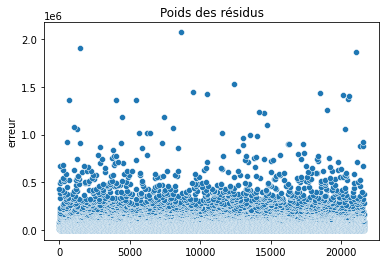

In [42]:
sns.scatterplot(residual.index, residual)
plt.title('Poids des résidus')
plt.ylabel('erreur')
plt.show()

In [43]:
# Chercher le poids de résidus spécifiques
df[df.bedrooms == 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode
15870,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,1947,0,98103


In [44]:
# Poids du résidu spécifique (?)
residual[residual.index == 15870]

15870    18699.4648
Name: price, dtype: float64

In [47]:
# Normaliser à nouveau(?)
preprocessing = ColumnTransformer([
    ("one_hot", OneHotEncoder(),cat_col),
    ("scaling", num_pipe, num_col)
])

model_lasso.fit(X_train, y_train)
model_lasso.score(X_test, y_test)

/home/nusbaumer/miniconda3/envs/nnp/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.511e+14, tolerance: 2.371e+11
  model = cd_fast.enet_coordinate_descent(


0.8639559619878272

In [67]:
# Trouver les meilleurs paramètres de la pipeline
model_autre = make_pipeline(PolynomialFeatures(), StandardScaler())
params = {
    'polynomialfeatures__degree' : [2]
}

grid = GridSearchCV(model_autre, param_grid=params, cv=4)
grid.fit(X_train, y_train)
grid.best_params_
grid.score(X_test, y_test)

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler())]) does not.

## Courbes d'apprentissage

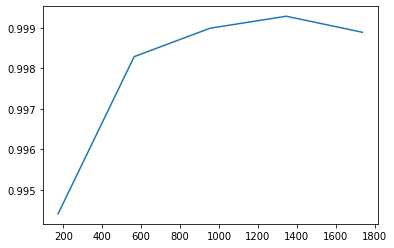

In [68]:
#Avec l'estimator

X, y = load_digits(return_X_y=True)
estimator = SVC(gamma=0.001)

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X, y, cv=30,return_times=True)

plt.plot(train_sizes,np.mean(train_scores,axis=1))

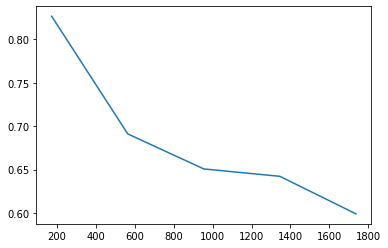

In [69]:
# Avec Ridge Regression (rr)

X, y = load_digits(return_X_y=True)
estimator = SVC(gamma=0.001)

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(rr, X, y, cv=30,return_times=True)

plt.plot(train_sizes,np.mean(train_scores,axis=1))

## Résultat

In [71]:
model.score(X_test, y_test)

NotFittedError: This PolynomialFeatures instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

 The performance of the models is summarized below:  
 
    Linear Regression Model: Test set RMSE of 1019 thousand and R-square of 83.96 percent.  

    Ridge Regression Model: Test set RMSE of 1017 thousand and R-square of 84.02 percent.  

    Lasso Regression Model: Test set RMSE of 1019 thousand and R-square of 83.96 percent.  
    
    ElasticNet Regression Model: Test set RMSE of 1379 thousand and R-square of 70.62 percent.  

The ElasticNet Regression model is performing the worst. All the other regression models are performing better with a decent R-squared and stable RMSE values. The most ideal result would be an RMSE value of zero and R-squared value of 1, but that's almost impossible in real economic datasets.  

There are other iterations that can be done to improve model performance. We have assigned the value of alpha to be 0.01, but this can be altered by hyper parameter tuning to arrive at the optimal alpha value. Cross-validation can also be tried along with feature selection techniques. However, that is not covered in this guide which was aimed at enabling individuals to understand and implement the various Linear Regression models using the scikit-learn library. 

In [73]:
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model_lasso, file)